In [227]:
# Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing, 

# Libraries for data visualization
import matplotlib.pyplot as pplt  
import seaborn as sns 
from pandas.plotting import scatter_matrix


from sklearn.metrics import classification_report, confusion_matrix
import datetime as dt

In [228]:
dataset_nonfiltered = pd.read_csv('vidio10.csv', error_bad_lines=False)

b'Skipping line 7655: expected 41 fields, saw 42\n'
b'Skipping line 28027: expected 41 fields, saw 49\nSkipping line 29868: expected 41 fields, saw 42\n'
b'Skipping line 41317: expected 41 fields, saw 49\n'
b'Skipping line 50334: expected 41 fields, saw 42\nSkipping line 57183: expected 41 fields, saw 42\nSkipping line 61465: expected 41 fields, saw 49\n'
b'Skipping line 68522: expected 41 fields, saw 49\nSkipping line 74582: expected 41 fields, saw 42\n'
b'Skipping line 83509: expected 41 fields, saw 42\nSkipping line 94944: expected 41 fields, saw 42\n'
b'Skipping line 130829: expected 41 fields, saw 42\n'
b'Skipping line 163627: expected 41 fields, saw 42\n'
b'Skipping line 185137: expected 41 fields, saw 42\n'
b'Skipping line 197897: expected 41 fields, saw 42\nSkipping line 206057: expected 41 fields, saw 42\n'
b'Skipping line 213623: expected 41 fields, saw 42\nSkipping line 216084: expected 41 fields, saw 42\nSkipping line 227679: expected 41 fields, saw 49\n'
b'Skipping line 25

In [229]:
dataset_nonfiltered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742582 entries, 0 to 742581
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hash_content_id    742582 non-null  object 
 1   hash_play_id       742582 non-null  object 
 2   hash_visit_id      742582 non-null  object 
 3   hash_watcher_id    742582 non-null  object 
 4   hash_film_id       40525 non-null   object 
 5   hash_event_id      742582 non-null  object 
 6   is_login           742582 non-null  bool   
 7   playback_location  742582 non-null  object 
 8   platform           742582 non-null  object 
 9   play_time          742582 non-null  object 
 10  end_time           742582 non-null  object 
 11  referrer           702119 non-null  object 
 12  average_bitrate    707495 non-null  float64
 13  bitrate_range      742582 non-null  object 
 14  total_bytes        742582 non-null  int64  
 15  buffer_duration    742582 non-null  float64
 16  re

In [230]:
dataset_nonfiltered.isnull().sum().sum()

8632465

In [231]:
pd.DataFrame(dataset_nonfiltered)

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
0,003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,ed8d97adbba52562575973553003d9a13b103bc4693a6c...,3ba64f349972d4c7c05eb08e6b91db156a91af555ded6f...,NaN,175c473e6bbf67c337bdbd14c9dbdf01c627bfe5af17c1...,True,direct,tv-android,2020-02-15T12:07:00.000Z,...,1.11.0 (50),NaN,1263,vod,NaN,FTV SCTV - Kecubit Cinta Sahabat Chantiq,Movies,NaN,NaN,NaN
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,NaN,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,2020-02-14T18:37:52.000Z,...,NaN,NaN,0,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
2,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,24abc04f114c9cb0c2087568093a909f04b3a567041fff...,4906987a7a6c3e27895e1adfd200d38e4f4fd87eb9ce96...,NaN,e73122fb4da263f0825c2ae5ac5c5a18da3a45c44b49e6...,False,embed,web-mobile,2020-02-15T11:58:24.000Z,...,NaN,NaN,8,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
3,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,f1279ae82e3c45f7591ad8e43f69a87d7444bf1c4b70b1...,adaf91b743f2f1d7b93819b22c016ca700182bd1a5b854...,NaN,1e8d1186fbc7677e10aa4a512f20ec01348e3e7f9e4cb7...,False,embed,web-mobile,2020-02-15T06:36:08.000Z,...,NaN,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
4,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,151db218c9cbad4d9fa1b1196fd998a63a8314698580a6...,15689b6aebb6b896c7fdadb516c9754a34a2fcfb772dc3...,NaN,210d2693895749e26711ee890ef41c461994ce91a673aa...,False,embed,web-mobile,2020-02-15T01:53:03.000Z,...,NaN,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742577,ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...,b3a473d24605db6e2eca25f700fe8ea0ea97638cf87e80...,5e516727927f3f0177f16fb0be2d5c82e66e358ea16817...,9209013711f31904c9df398e324bb0f0e6453eb65cbebf...,NaN,30dbdcd95c43a8b3bba69e2c3a75816a2a3f028b71a265...,False,embed,web-mobile,2020-02-09T10:51:23.000Z,...,NaN,NaN,38,vod,NaN,Grammy Awards Beri Penghormatan Terakhir Untuk...,News,NaN,NaN,NaN
742578,ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...,cb5fec13d41c54d72b478d9ee7eb4b98671b9d7e1f6ea8...,26f0b83af96401b14fc1bbdd7671bcab19eb45d86034e8...,bf2be8faea8f1d43cd77690384368177f4a443ed27b908...,NaN,16e524d9a1a6d5e324c17d0fb3a28caf09232ad2660f7f...,False,embed,web-mobile,2020-02-09T02:49:03.000Z,...,NaN,NaN,5,vod,NaN,Grammy Awards Beri Penghormatan Terakhir Untuk...,News,NaN,NaN,NaN
742579,ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...,d9f43a7d253e89de88e5280f8d4597caabb8704c3a4ce0...,90d1ddc2984570ffafa169419b7a93bd9ee7511267ae0f...,502c28363dd19307cc907f548ab0b1c8ec71699e2c3bfc...,NaN,c184305bf88efbfffe1f7fae702f3c67e9b950db45230a...,False,embed,web-mobile,2020-02-09T08:57:13.000Z,...,NaN,NaN,3,vod,NaN,Grammy Awards Beri Penghormatan Terakhir Untuk...,News,NaN,NaN,NaN
742580,ffa44de6aa2e52bcf8a6e8a5ae40d525db2b323d31d3e1...,dab5bcc8460b2c60917cd16e3e75acaa6f5a1fc213053c...,f86b27fde2a1d8c78743d936c8a9719e551fb17cbcbc3f...,1b2f0e558021a570cb90d1c5e864cf7d471a278825b08b...,NaN,44581e34aaf6c63f5cd79e22cdb7a4dac40c7f0f489a5c...,False,embed,web-mobile,2020-02-09T03:57:42.000Z,...,NaN,NaN,8,vod,NaN,Grammy Awards Beri Penghormatan Terakhir Untuk...,News,NaN,NaN,NaN


In [232]:
dataset_nonfiltered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742582 entries, 0 to 742581
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hash_content_id    742582 non-null  object 
 1   hash_play_id       742582 non-null  object 
 2   hash_visit_id      742582 non-null  object 
 3   hash_watcher_id    742582 non-null  object 
 4   hash_film_id       40525 non-null   object 
 5   hash_event_id      742582 non-null  object 
 6   is_login           742582 non-null  bool   
 7   playback_location  742582 non-null  object 
 8   platform           742582 non-null  object 
 9   play_time          742582 non-null  object 
 10  end_time           742582 non-null  object 
 11  referrer           702119 non-null  object 
 12  average_bitrate    707495 non-null  float64
 13  bitrate_range      742582 non-null  object 
 14  total_bytes        742582 non-null  int64  
 15  buffer_duration    742582 non-null  float64
 16  re

In [233]:
dataset_nonfiltered.describe()

,average_bitrate,total_bytes,buffer_duration,city,play_duration
count,707495.000000,7.425820e+05,7.425820e+05,0.0,742582.000000
mean,199515.374461,8.040253e+07,4.072597e+02,NaN,433.071647
std,141363.148294,5.136991e+08,7.188516e+04,NaN,1651.243972
min,144.000000,0.000000e+00,-4.639000e+00,NaN,0.000000
25%,625.000000,7.500000e+02,1.000000e-02,NaN,3.000000
50%,300000.000000,5.062500e+05,1.000000e+00,NaN,40.000000
75%,300000.000000,1.125000e+07,6.000000e+00,NaN,120.000000
max,300000.000000,5.065312e+10,6.117224e+07,NaN,135075.000000


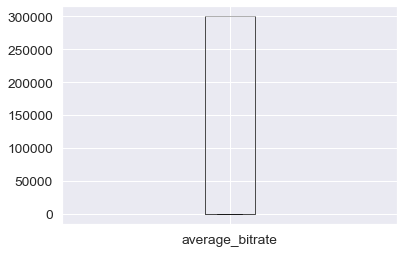

In [234]:
boxplot1 = dataset_nonfiltered.boxplot(column=['average_bitrate'])



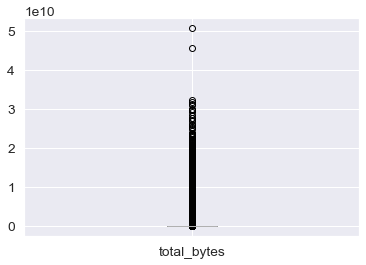

In [235]:
boxplot2 = dataset_nonfiltered.boxplot(column=['total_bytes'])

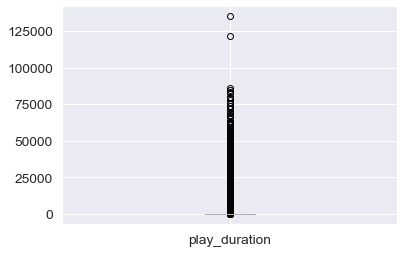

In [236]:
boxplot3 = dataset_nonfiltered.boxplot(column=[ 'play_duration'])

In [237]:
dataset_temp = dataset_nonfiltered[dataset_nonfiltered['play_duration'] > 0]
dataset = dataset_temp[dataset_temp['total_bytes'] > 0]
#Membersihkan data dari kolom dengan durasi play = 0 atau total byte = 0


In [238]:
dataset.describe()

,average_bitrate,total_bytes,buffer_duration,city,play_duration
count,564861.000000,5.648610e+05,5.648610e+05,0.0,564861.000000
mean,204376.624315,1.056993e+08,3.514573e+02,NaN,569.328047
std,139569.977462,5.867190e+08,1.271705e+04,NaN,1872.671842
min,144.000000,1.800000e+02,-4.639000e+00,NaN,1.000000
25%,700.000000,5.032500e+04,1.370000e-01,NaN,29.000000
50%,300000.000000,2.025000e+06,1.630000e+00,NaN,60.000000
75%,300000.000000,2.250000e+07,7.199000e+00,NaN,240.000000
max,300000.000000,5.065312e+10,4.170141e+06,NaN,135075.000000


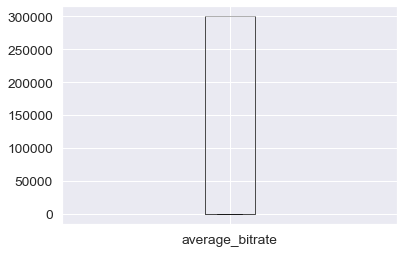

In [239]:
boxplot1_filtered = dataset.boxplot(column=['average_bitrate'])

#cek distribusi dari rata rata bitrate user

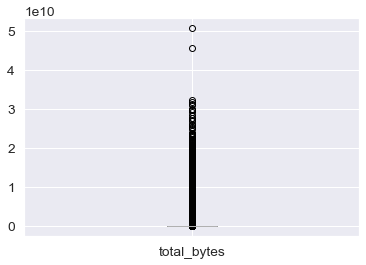

In [240]:
boxplot2_filtered = dataset.boxplot(column=['total_bytes'])

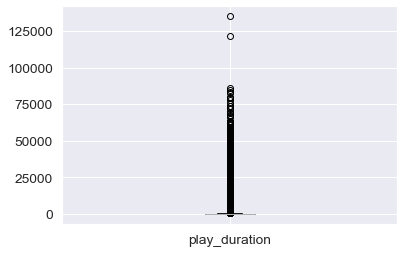

In [241]:
boxplot3_filtered = dataset.boxplot(column=['play_duration'])

In [242]:
dataset['category_name'] = dataset['category_name'].fillna('Others')
dataset['os_name'] = dataset['os_name'].fillna('Other')
dataset['player_name'] = dataset['player_name'].fillna('Other')

#membersihkan data NaN dari set data

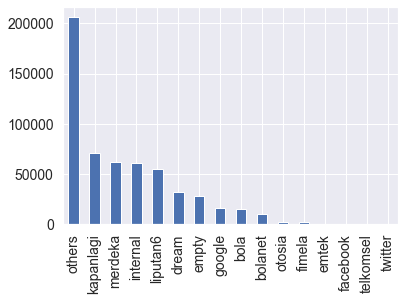

In [243]:
from matplotlib.ticker import StrMethodFormatter

dataset.referrer_group.value_counts().plot(kind='bar', fontsize=14); 

#mengecek sumber play video

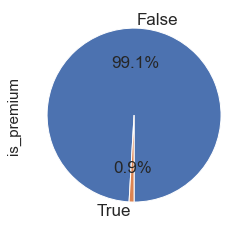

In [244]:
dataset.is_premium.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=270, fontsize=17); 

#mengecek persentase user premium dari data

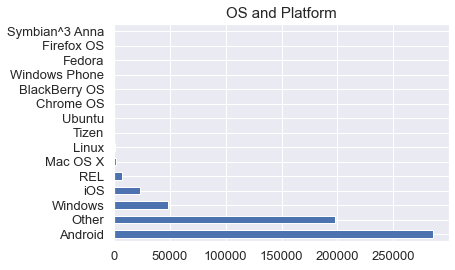

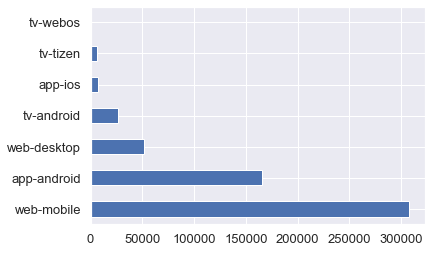

In [245]:
pplt.title('OS and Platform')
dataset.os_name.value_counts().plot(kind='barh', fontsize=13);
pplt.show()
dataset.platform.value_counts().plot(kind='barh', fontsize=13); 
pplt.show()

#Mengecek platform yang digunakan oleh user

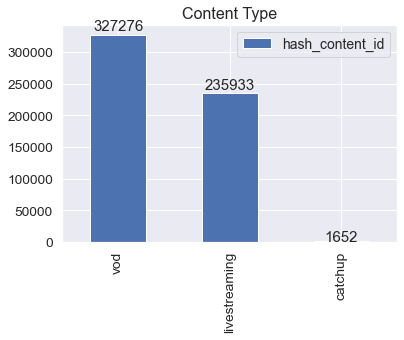

In [246]:
ax = dataset.content_type.value_counts().plot(kind='bar');
pplt.legend(labels=dataset.columns,fontsize= 14)
pplt.title("Content Type",fontsize= 16)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')


#melihat konten yang banyak ditonton oleh user

78.90222098058388

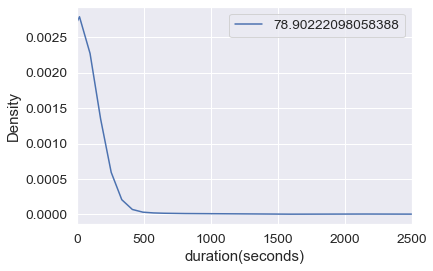

In [296]:
data_play=dataset.play_duration.value_counts().sort_index(ascending=True)
dataplaymean = data_play.agg("mean")
data_play.plot(kind='kde')
pplt.xlim([0, 2500])
pplt.xlabel('duration(seconds)')
pplt.legend([dataplaymean])
import statistics
statistics.mean(dataset.play_duration.value_counts())


#mengecek rataan durasi user menonton suatu video dalam 1x sesi

In [297]:
statistics.median(dataset.play_duration.value_counts())


4

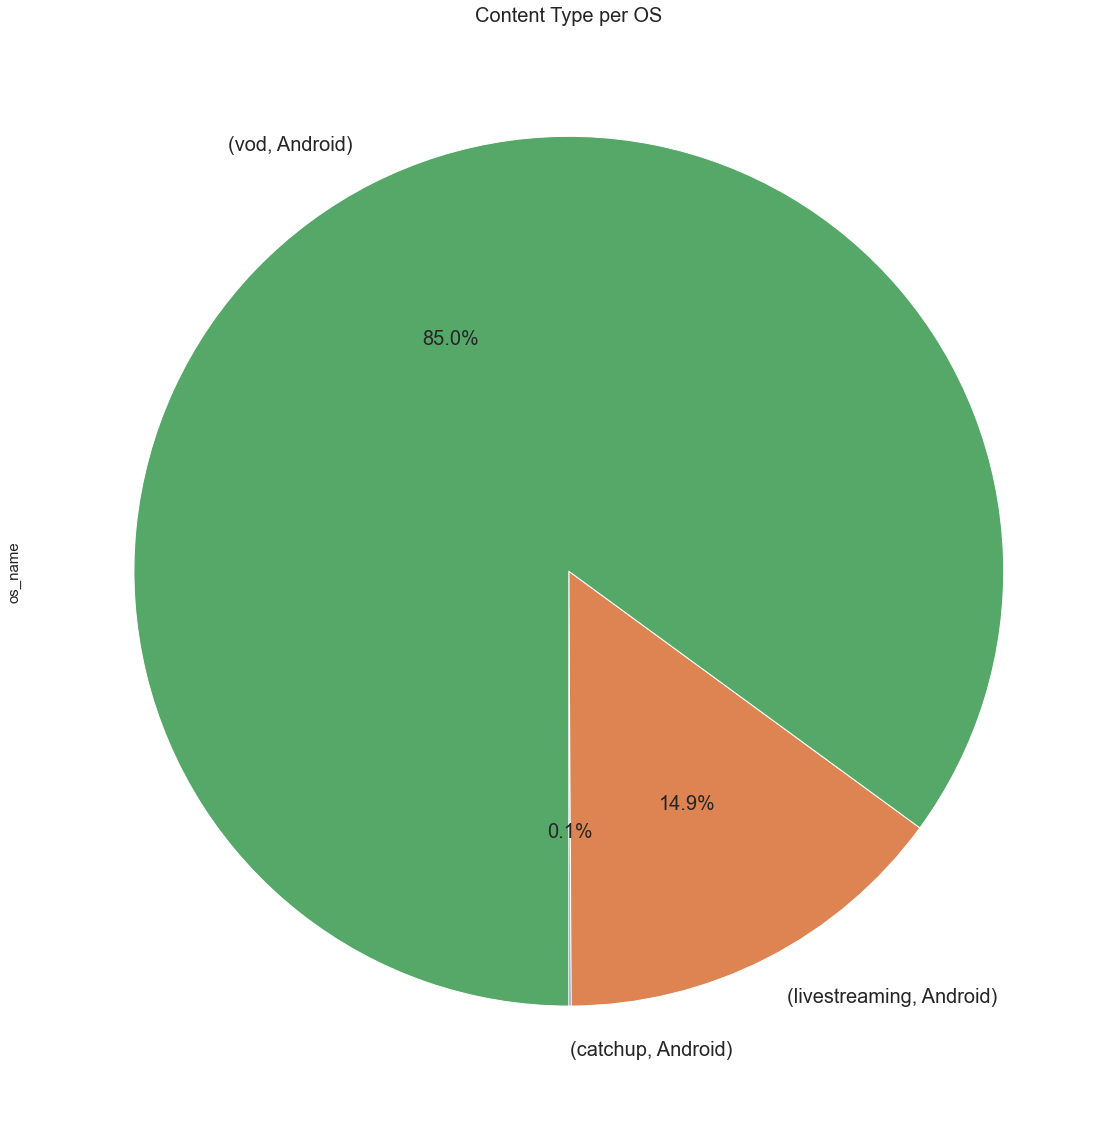

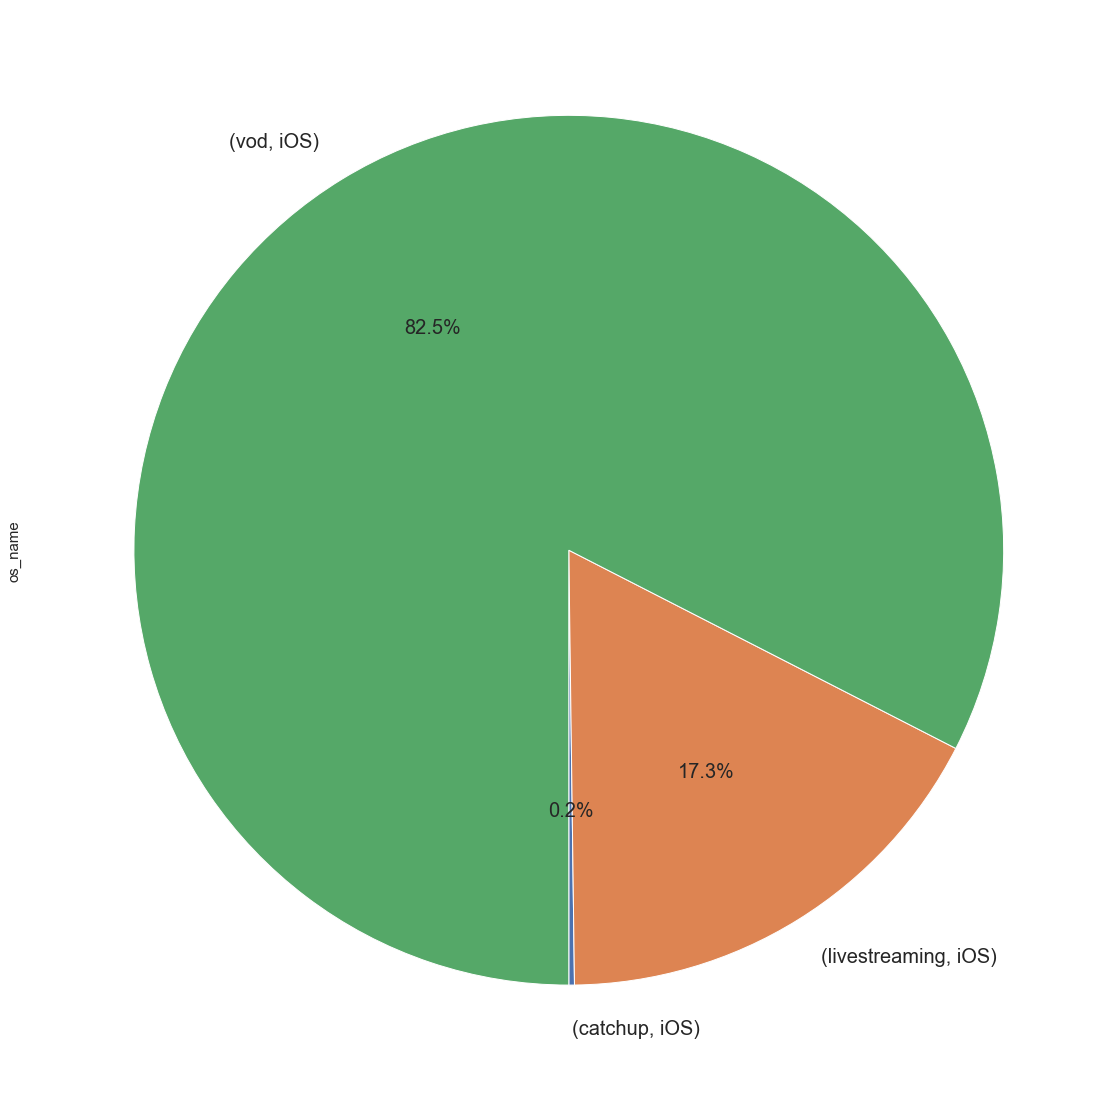

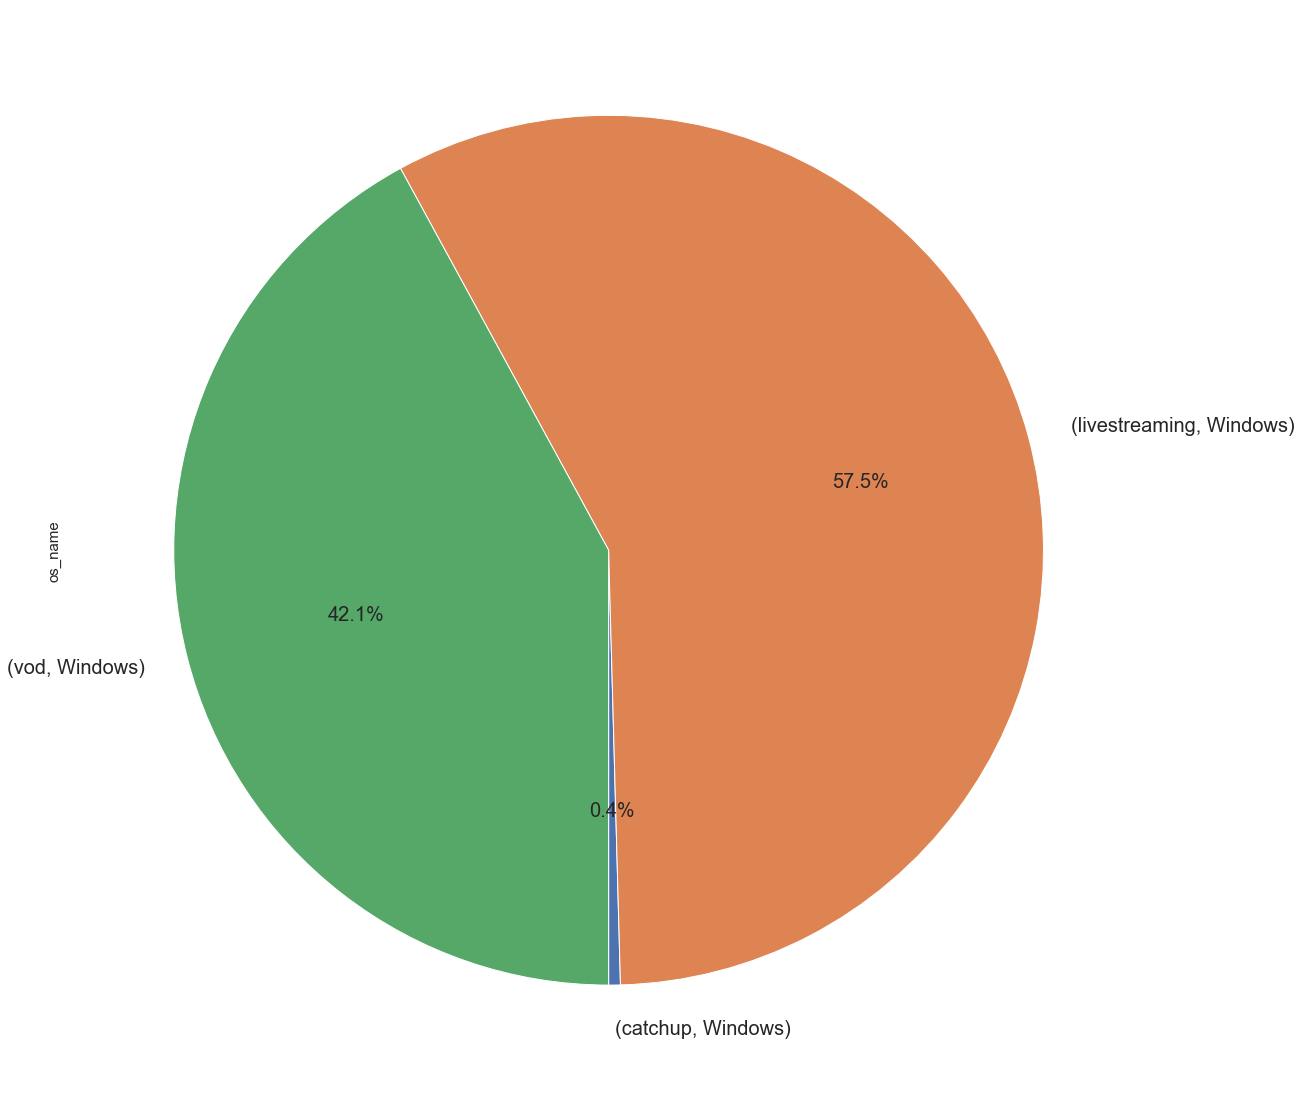

In [248]:
dataset_android = dataset[dataset['os_name'] == 'Android']
dataset_ios = dataset[dataset['os_name'] == 'iOS']
dataset_windows = dataset[dataset['os_name'] == 'Windows']

pplt.title("Content Type per OS",fontsize= 20)
dataset_android.groupby('content_type')['os_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=270, figsize = (20, 20), fontsize= 20)
pplt.show()
dataset_ios.groupby('content_type')['os_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=270, figsize = (20, 20), fontsize= 20)
pplt.show()
dataset_windows.groupby('content_type')['os_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=270, figsize = (20, 20), fontsize= 20)
pplt.show()


#mengecek konten yang dilihat user berdasar platform yang digunakan user untuk mengakses vidio

In [249]:
df1 = dataset.groupby('os_name')['average_bitrate'].value_counts().sort_index(ascending = True)

In [250]:
pd.DataFrame(df1)

average_bitrate
os_name       average_bitrate                 
Android       144.0                       2464
              183.0                          1
              196.0                         15
              222.0                       1201
              248.0                         27
...                                        ...
Windows Phone 300000.0                       8
iOS           400.0                          6
              500.0                          2
              600.0                         61
              300000.0                   22999

[905 rows x 1 columns]

In [251]:
df1.to_csv('vidio_m nashih amien_question_1_1.csv')

In [252]:
df2 = dataset.groupby('browser_name')['average_bitrate'].value_counts().sort_index(ascending = True)

In [253]:
df2.to_csv('vidio_m nashih amien_question_1_2.csv', mode='a', header=False)


In [254]:
dataset.groupby('os_name')['completed'].value_counts().sort_index(ascending = True)

os_name         completed
Android         False        161654
                True          81262
BlackBerry OS   False             7
                True              2
Chrome OS       False            22
                True              6
Firefox OS      False             1
Linux           False           152
                True             74
Mac OS X        False           622
                True            415
Other           False         26058
                True          18535
REL             False           332
                True            242
Symbian^3 Anna  False             1
Tizen           False            18
                True              3
Ubuntu          False            24
                True             26
Windows         False         11518
                True           8861
Windows Phone   False             3
                True              3
iOS             False         12674
                True           6413
Name: completed, dtype: int64

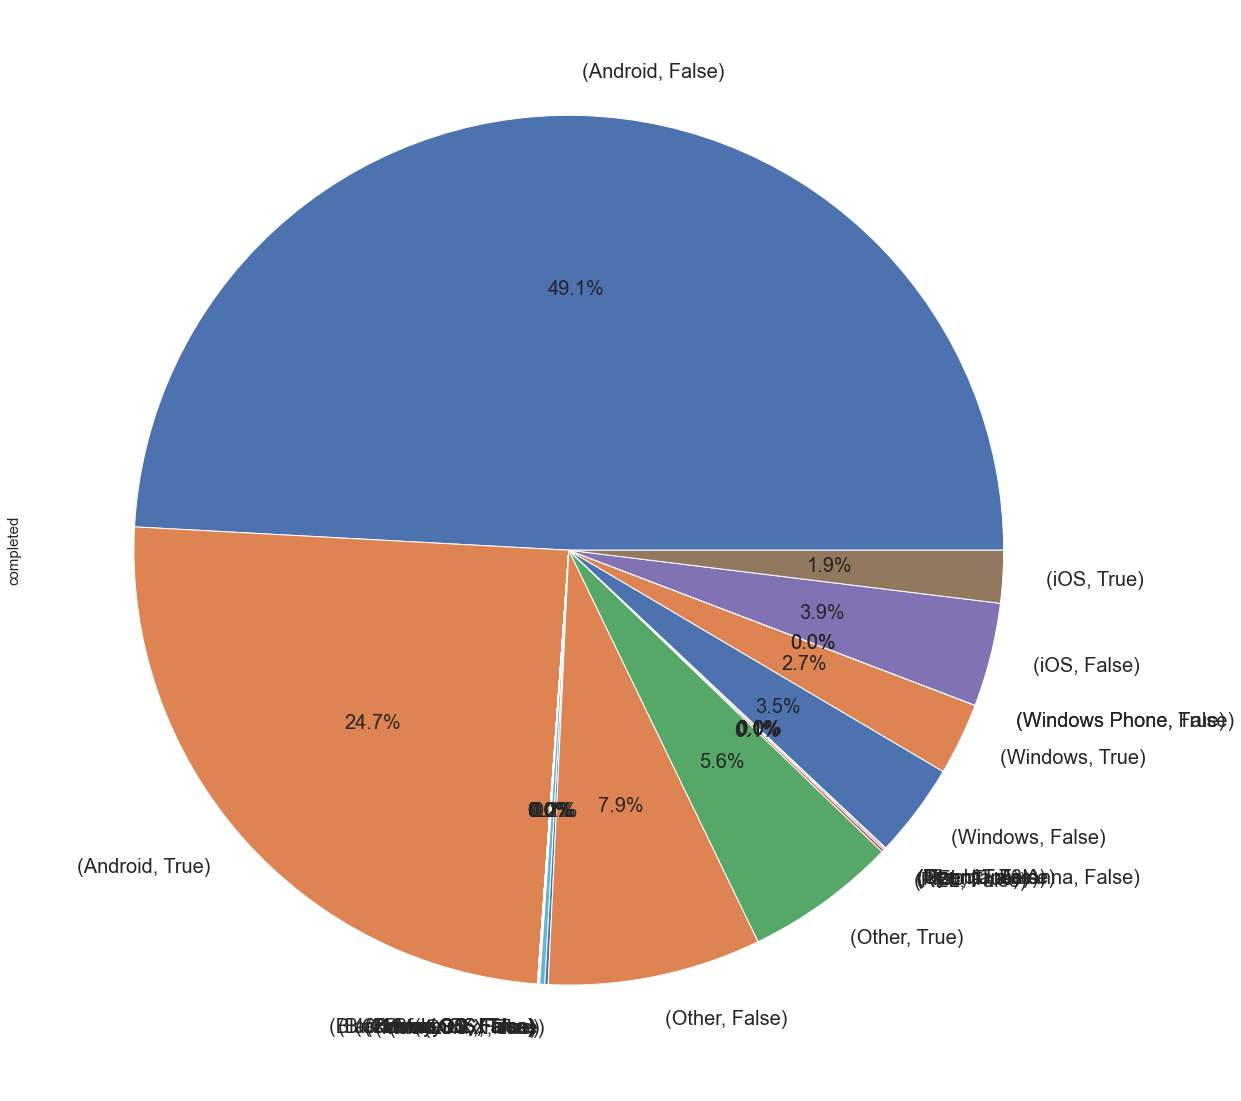

In [255]:
dataset.groupby('os_name')['completed'].value_counts().plot(kind='pie', fontsize=20,autopct='%1.1f%%', figsize = (20,20)); 

In [256]:
dataset.completed.value_counts()

False    213086
True     115842
Name: completed, dtype: int64

In [257]:
dataset.groupby('content_type')['completed'].value_counts().sort_index(ascending = True)

content_type  completed
catchup       False          1312
              True            340
vod           False        211774
              True         115502
Name: completed, dtype: int64

In [258]:
dataset.groupby('stream_type')['title'].value_counts(sort=True)

stream_type  title                                                                                             
EventStream  NBA All-Star 2020 - All Star Game - 17 Feb 2020 | 08:00 WIB                                           639
             Vidio Talk Ngobrol Bareng Iqbaal dan Vanesha - 10 Feb 2020 | 16:00WIB                                 605
             SINEMANIA \Get Married - Vidio Original Series\" BARENG DAVID & YULIANA - 16 Feb 2020 | 14:00 WIB"    545
             Sinemania \Get Married - Vidio Original Series\" Bareng David & Yuliana - 16 Feb 2020 | 14:00 WIB"    512
             BAPER (BAWA PERUBAHAN) - Komunikasi Lewat Secangkir Kopi - 06 Feb 2020 | 15:00 WIB                    500
                                                                                                                  ... 
TvStream     ZING                                                                                                   12
             Citra Muslim                              

In [259]:
dataset.app_name.value_counts()

vidio       564738
liputan6        73
bola            50
Name: app_name, dtype: int64

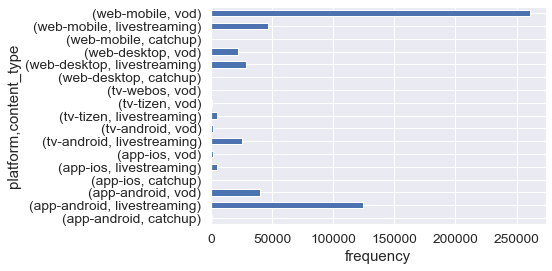

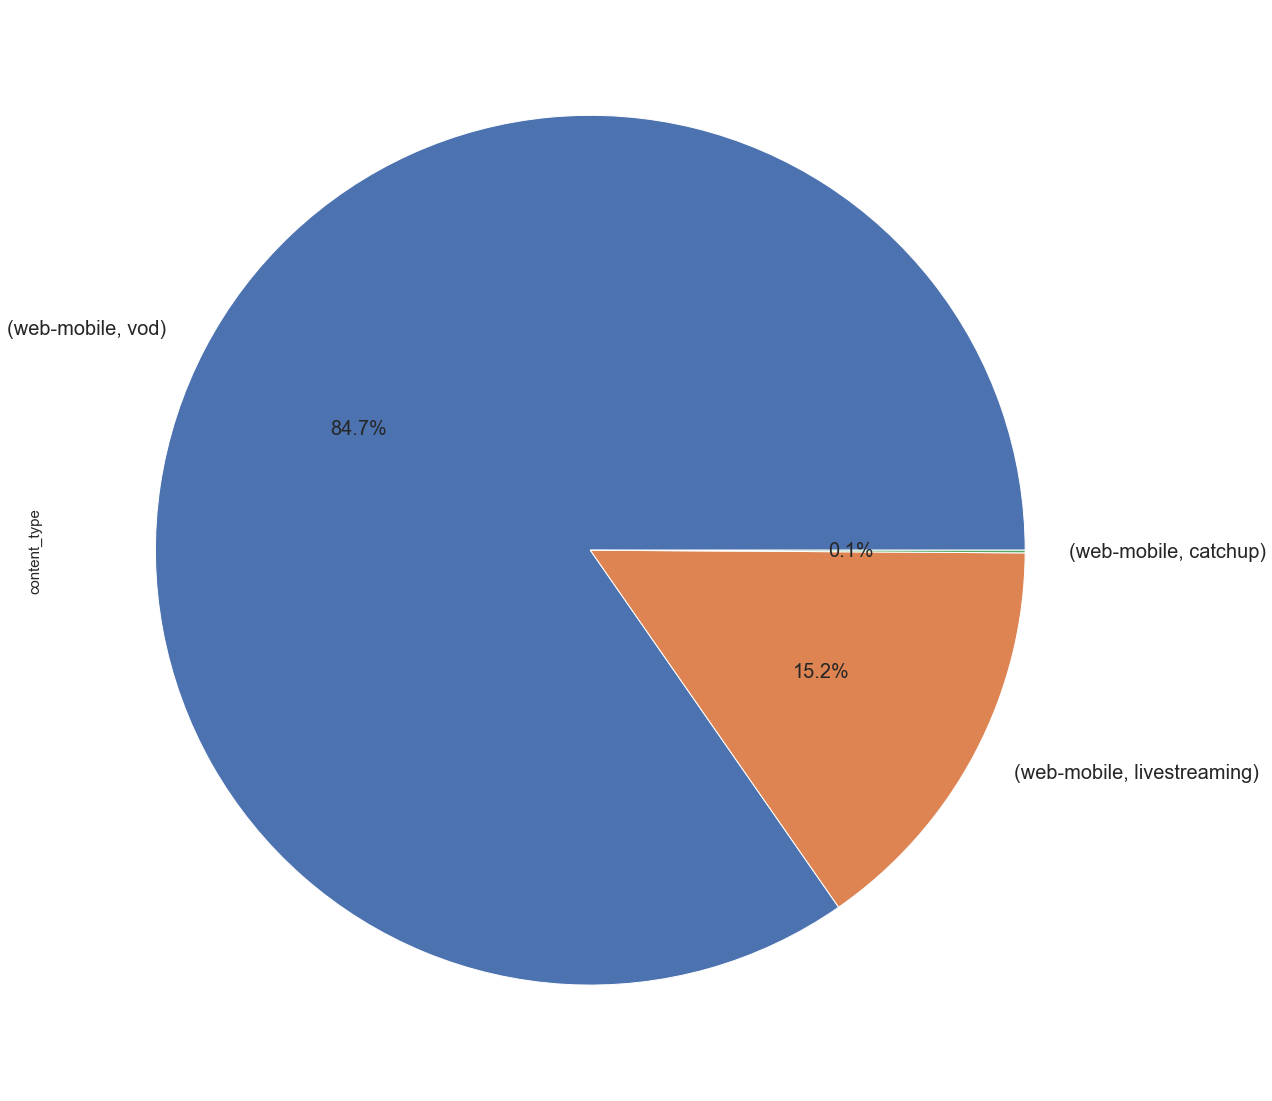

In [328]:
dataset_webmobile = dataset[dataset['platform'] == 'web-mobile']


dataset.groupby('platform')['content_type'].value_counts().sort_index(ascending=True).plot(kind='barh')
pplt.xlabel('frequency')
pplt.show()
dataset_webmobile.groupby('platform')['content_type'].value_counts().plot(kind='pie', fontsize=20,autopct='%1.1f%%', figsize = (20,20));
pplt.show()




IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1

In [264]:
dataset.groupby('platform')['content_type'].value_counts().sort_index(ascending=True)

platform     content_type 
app-android  catchup            1062
             livestreaming    124589
             vod               40217
app-ios      catchup              64
             livestreaming      4940
             vod                1878
tv-android   livestreaming     25269
             vod                1386
tv-tizen     livestreaming      5326
             vod                 546
tv-webos     vod                   3
web-desktop  catchup             223
             livestreaming     28890
             vod               22376
web-mobile   catchup             303
             livestreaming     46919
             vod              260870
Name: content_type, dtype: int64

In [265]:
dataset['play_time'] = pd.to_datetime(dataset['play_time']).dt.date


In [266]:
dfplayperday = dataset[['play_time', 'play_duration', 'hash_watcher_id', 'title', 'end_time']].groupby(['play_time'])
dfmax = dfplayperday.agg(max).reset_index().sort_values(by='play_time')
dfmax
dfmax.to_csv('vidio_m nashih amien_question_5.csv')

Text(0, 0.5, 'duration(seconds)')

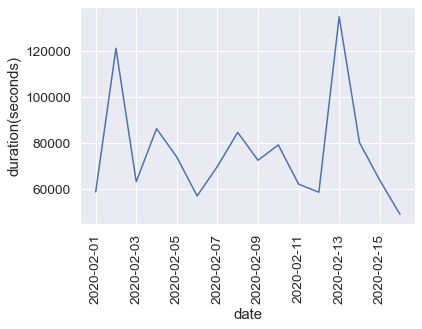

In [267]:
dates = dfmax.play_time


x_values = dates
y_values = dfmax.play_duration

ax = pplt.gca()



pplt.plot(x_values, y_values)
pplt.xticks(rotation=90)
pplt.xlabel('date')
pplt.ylabel('duration(seconds)')

In [268]:
dataset_number = dataset[['average_bitrate', 'total_bytes', 'buffer_duration', 'play_duration']].copy() 


In [269]:
dataset_number['platform'] = dataset['platform'].map({'web-mobile': 7, 'tv-android': 1, 'tv-webos': 2, 'app-android': 3, 'app-ios': 4, 'tv-tizen': 5, 'web-desktop': 6}).astype(int)
dataset_number['content'] = dataset['content_type'].map({'catchup': 1, 'livestreaming': 2, 'vod': 3}).astype(int)
dataset_number['category'] = dataset['category_name'].map({'Others': 0, 'Movies': 1, 'Music': 2, 'Education': 3, 'Webtoon': 4, 'Lifestyle': 5, 'Sports': 6, 'News': 7, 'Horror': 8, 'TV Show': 9, 'Entertainment': 10, 'Vlog': 11, 'Kids': 12, 'Funny': 13, 'Champions': 14, 'Korea': 15})
dataset_number['bitrange'] = dataset['bitrate_range'].map({'200-500': 350, '0-200': 100}).astype(int)
dataset_number['appname'] = dataset['app_name'].map({'liputan6': 1, 'vidio': 2, 'bola': 3}).astype(int)
dataset_number['playback'] = dataset['playback_location'].map({'direct': 1, 'embed': 2}).astype(int)
dataset_number['os'] = dataset['os_name'].map({'Chrome OS': 1, 'Windows Phone': 2, 'Android': 3, 'Tizen': 4, 'REL': 5, 'Ubuntu': 6, 'Symbian^3 Anna': 7, 'Linux': 8, 'Windows': 9, 'Fedora': 10, 'Mac OS X': 11, 'BlackBerry OS': 12, 'Other':13, 'iOS': 14, 'Firefox OS': 15})
dataset_number['player'] = dataset['player_name'].map ({'Other': 1, 'videojs': 2, 'KmkExoVideoView': 3, 'kmkexoplayer': 4})

In [270]:
dataset_number.describe()

,average_bitrate,total_bytes,buffer_duration,play_duration,platform,content,category,bitrange,appname,playback,os,player
count,564861.000000,5.648610e+05,5.648610e+05,564861.000000,564861.000000,564861.000000,564861.000000,564861.000000,564861.000000,564861.000000,564861.000000,564861.000000
mean,204376.624315,1.056993e+08,3.514573e+02,569.328047,5.393771,2.576467,4.397438,270.135662,1.999959,1.471829,7.529033,2.312907
std,139569.977462,5.867190e+08,1.271705e+04,1872.671842,2.014857,0.500002,4.251397,116.566702,0.014756,0.499206,4.784387,0.515299
min,144.000000,1.800000e+02,-4.639000e+00,1.000000,1.000000,1.000000,0.000000,100.000000,1.000000,1.000000,1.000000,1.000000
25%,700.000000,5.032500e+04,1.370000e-01,29.000000,3.000000,2.000000,0.000000,100.000000,2.000000,1.000000,3.000000,2.000000
50%,300000.000000,2.025000e+06,1.630000e+00,60.000000,7.000000,3.000000,6.000000,350.000000,2.000000,1.000000,3.000000,2.000000
75%,300000.000000,2.250000e+07,7.199000e+00,240.000000,7.000000,3.000000,7.000000,350.000000,2.000000,2.000000,13.000000,3.000000
max,300000.000000,5.065312e+10,4.170141e+06,135075.000000,7.000000,3.000000,15.000000,350.000000,3.000000,2.000000,15.000000,4.000000


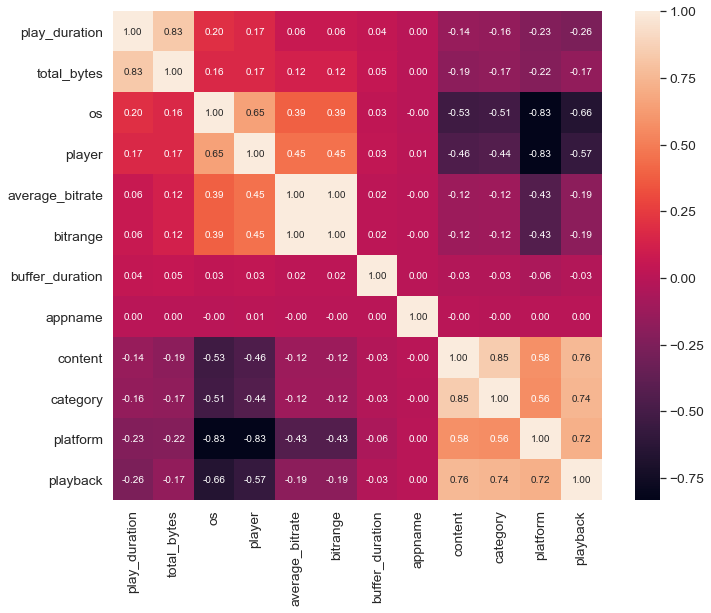

In [271]:
corrmat = dataset_number.corr()
f, ax = pplt.subplots(figsize=(12, 9))
k = 12 #number of variables for heatmap
cols = corrmat.nlargest(k, 'play_duration')['play_duration'].index
cm = np.corrcoef(dataset_number[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

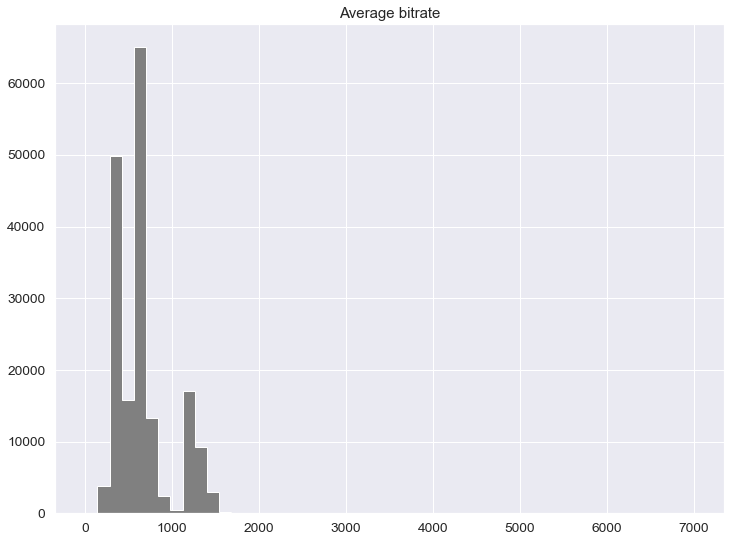

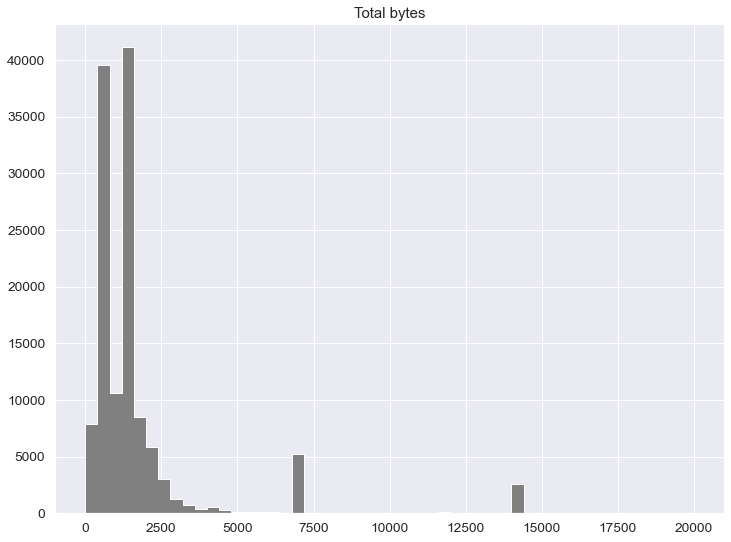

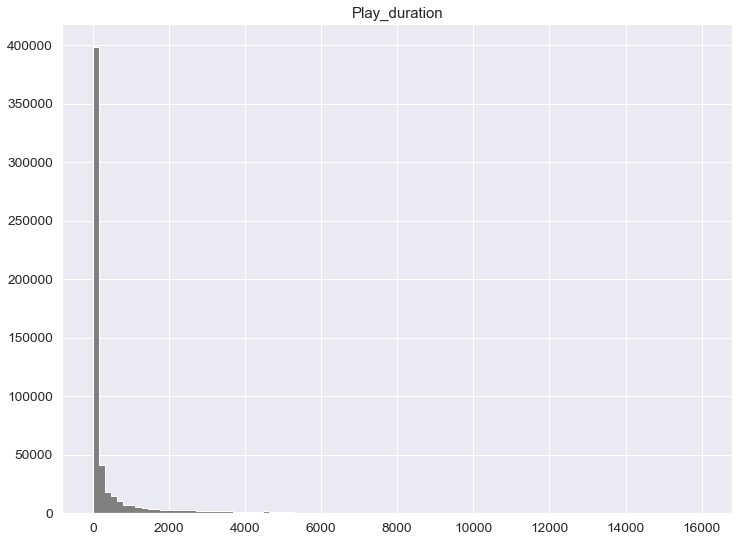

In [272]:
dataset_number.average_bitrate.hist(figsize=(12,9), range=[0, 7000], histtype = 'stepfilled', bins =50, facecolor='gray', align='mid')
pplt.title('Average bitrate')
pplt.show()
dataset_number.total_bytes.hist(figsize=(12,9), range=[0, 20000], histtype = 'stepfilled', bins =50, facecolor='gray', align='mid')
pplt.title('Total bytes')
pplt.show()
dataset_number.play_duration.hist(figsize=(12,9), range=[0, 16000], histtype = 'stepfilled', bins =100, facecolor='gray', align='mid')
pplt.title('Play_duration')
pplt.show()


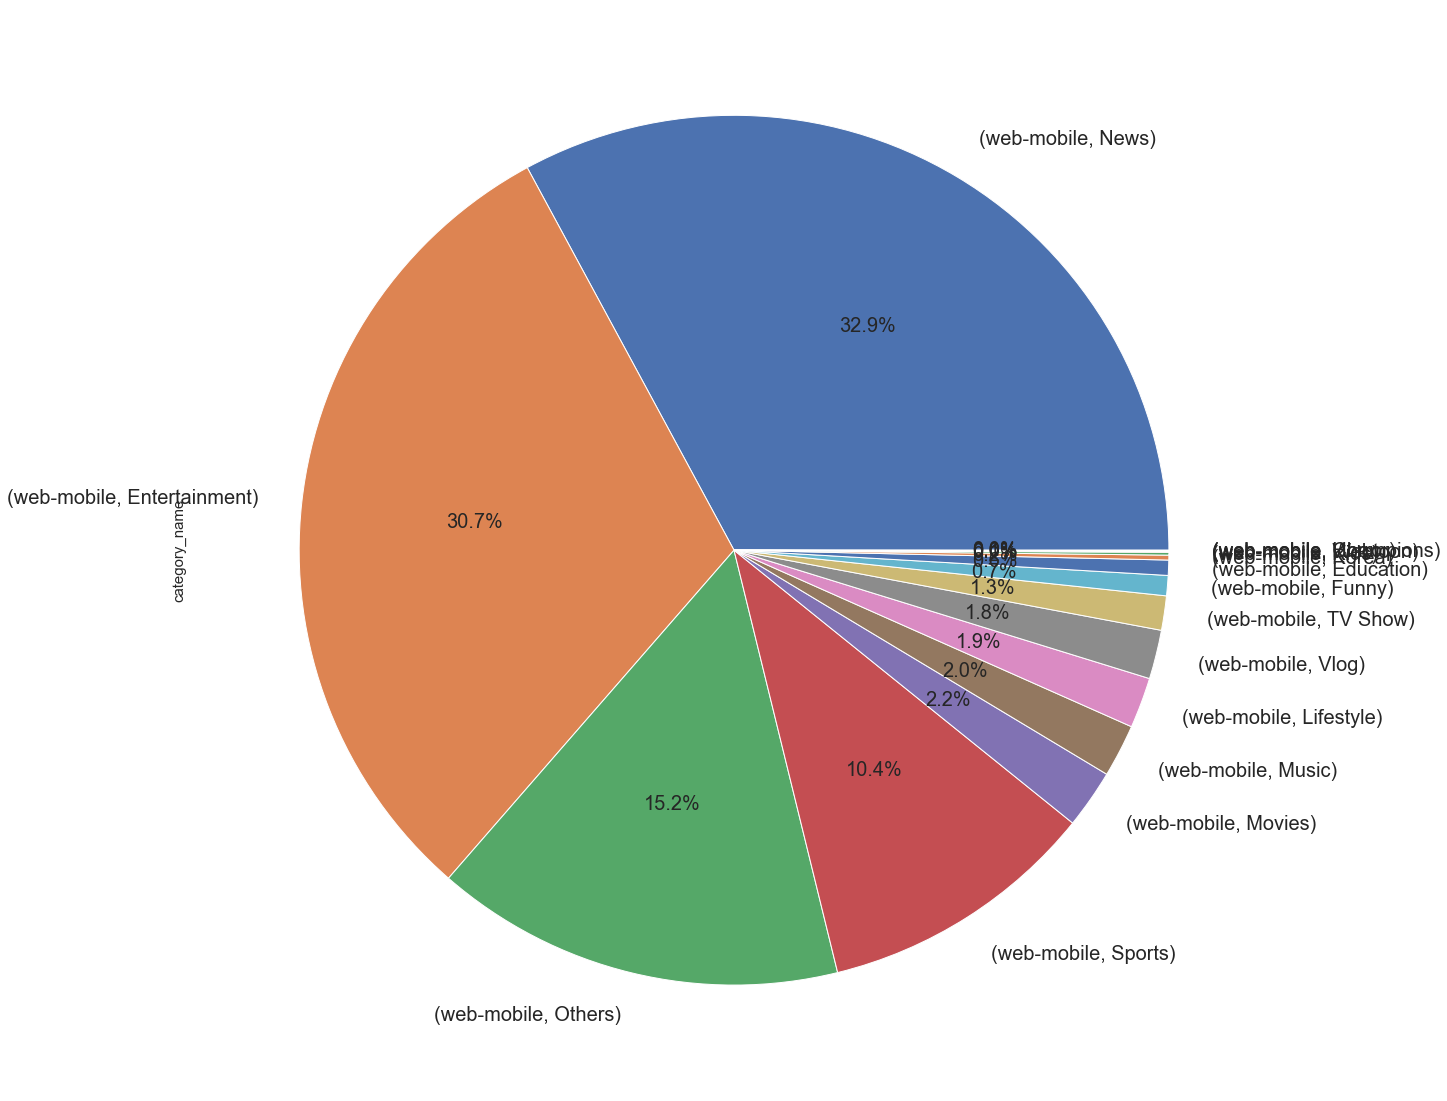

In [307]:
plct = dataset.groupby('platform')['category_name'].value_counts().sort_index(ascending = True)

dataset_webmobile.groupby('platform')['category_name'].value_counts().plot(kind='pie', fontsize=20,autopct='%1.1f%%', figsize = (20,20));

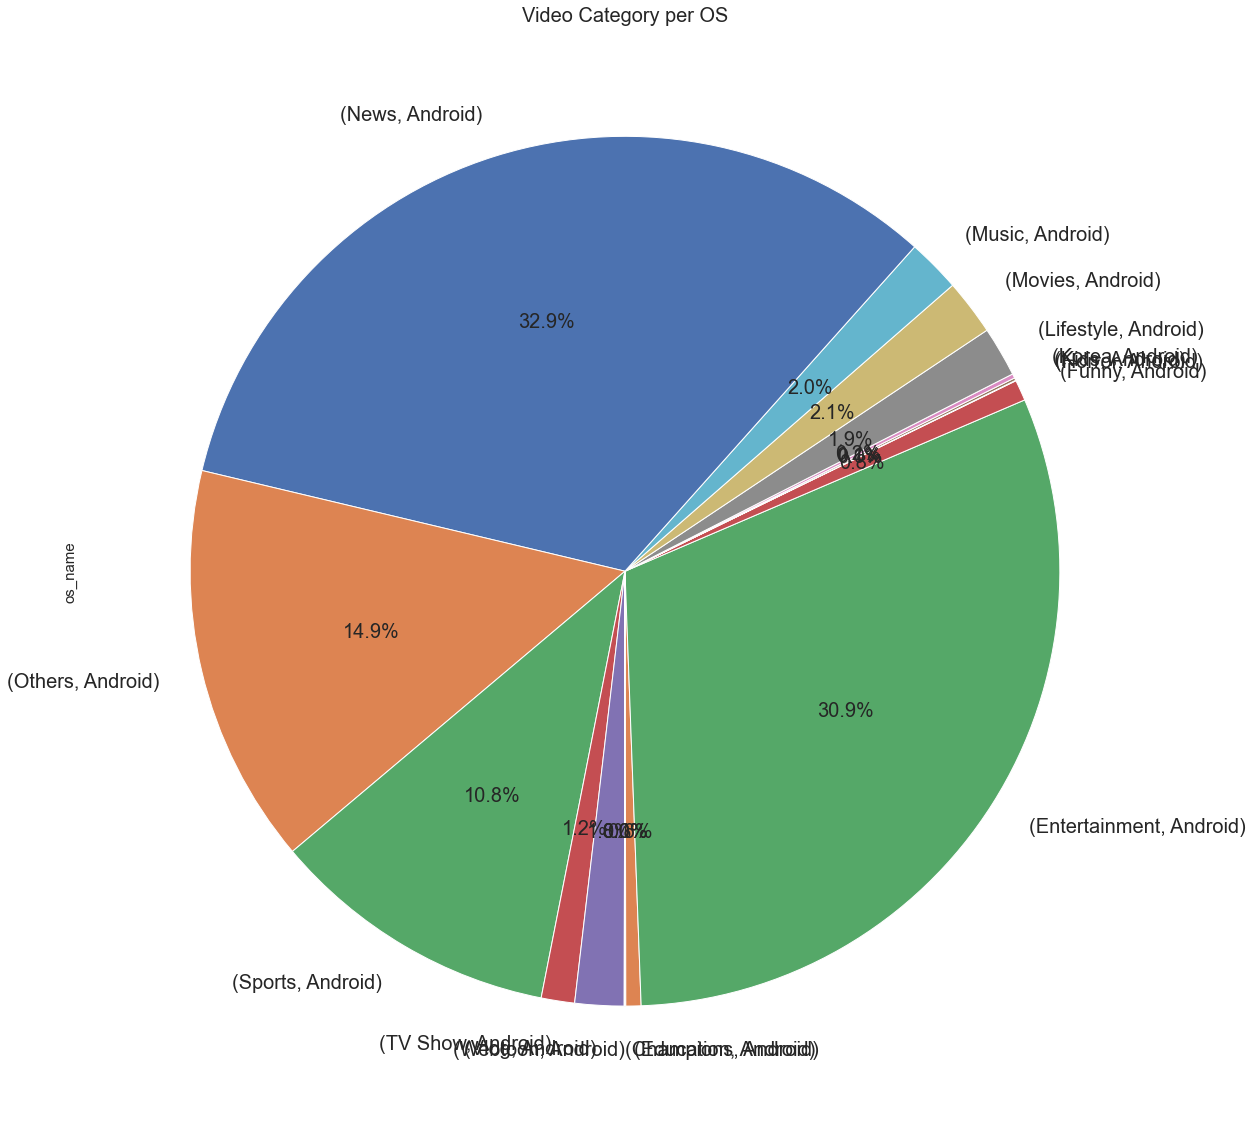

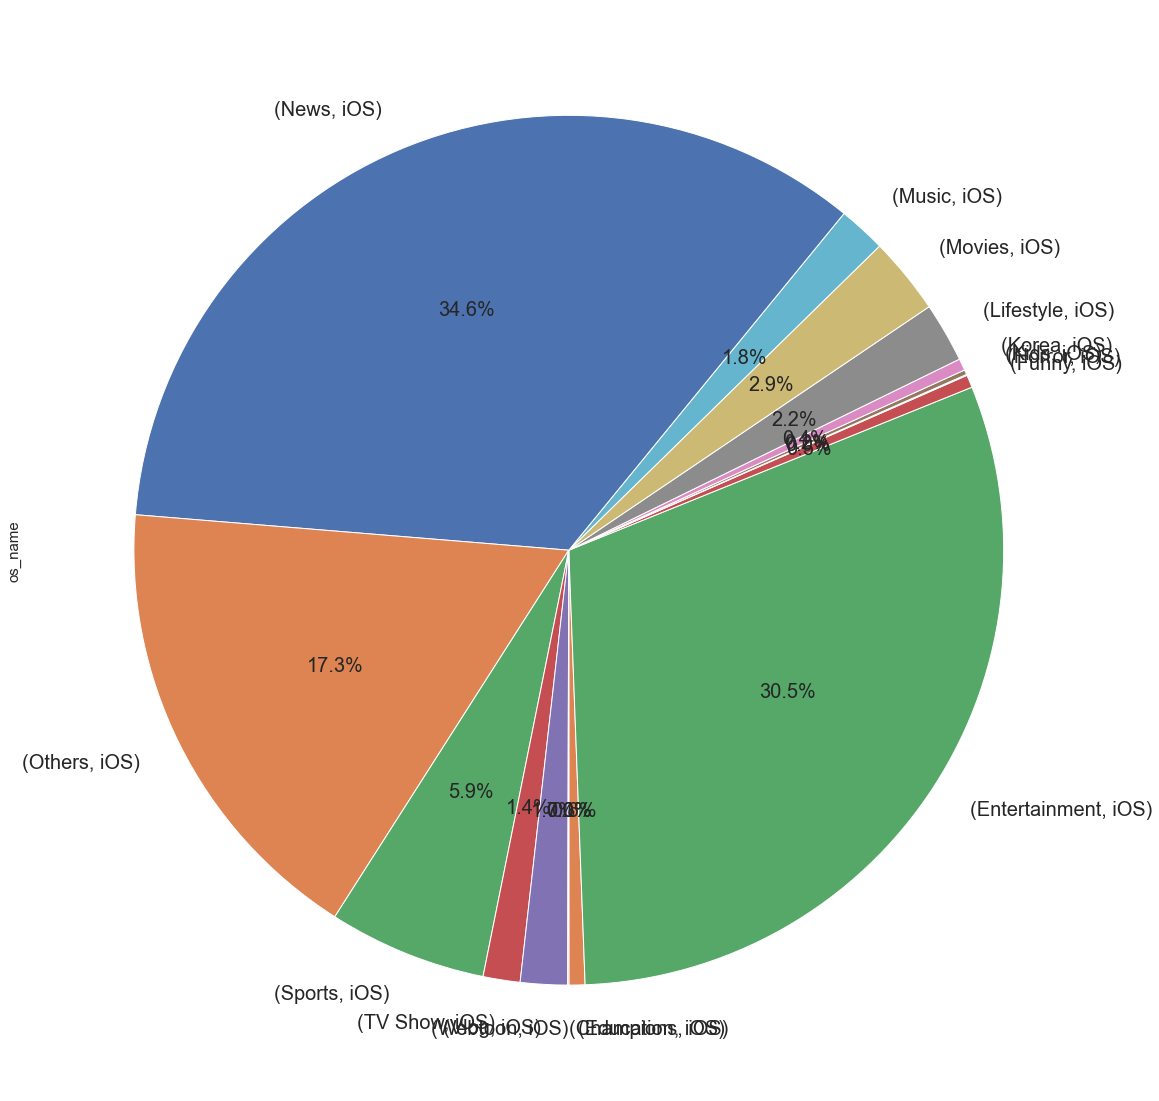

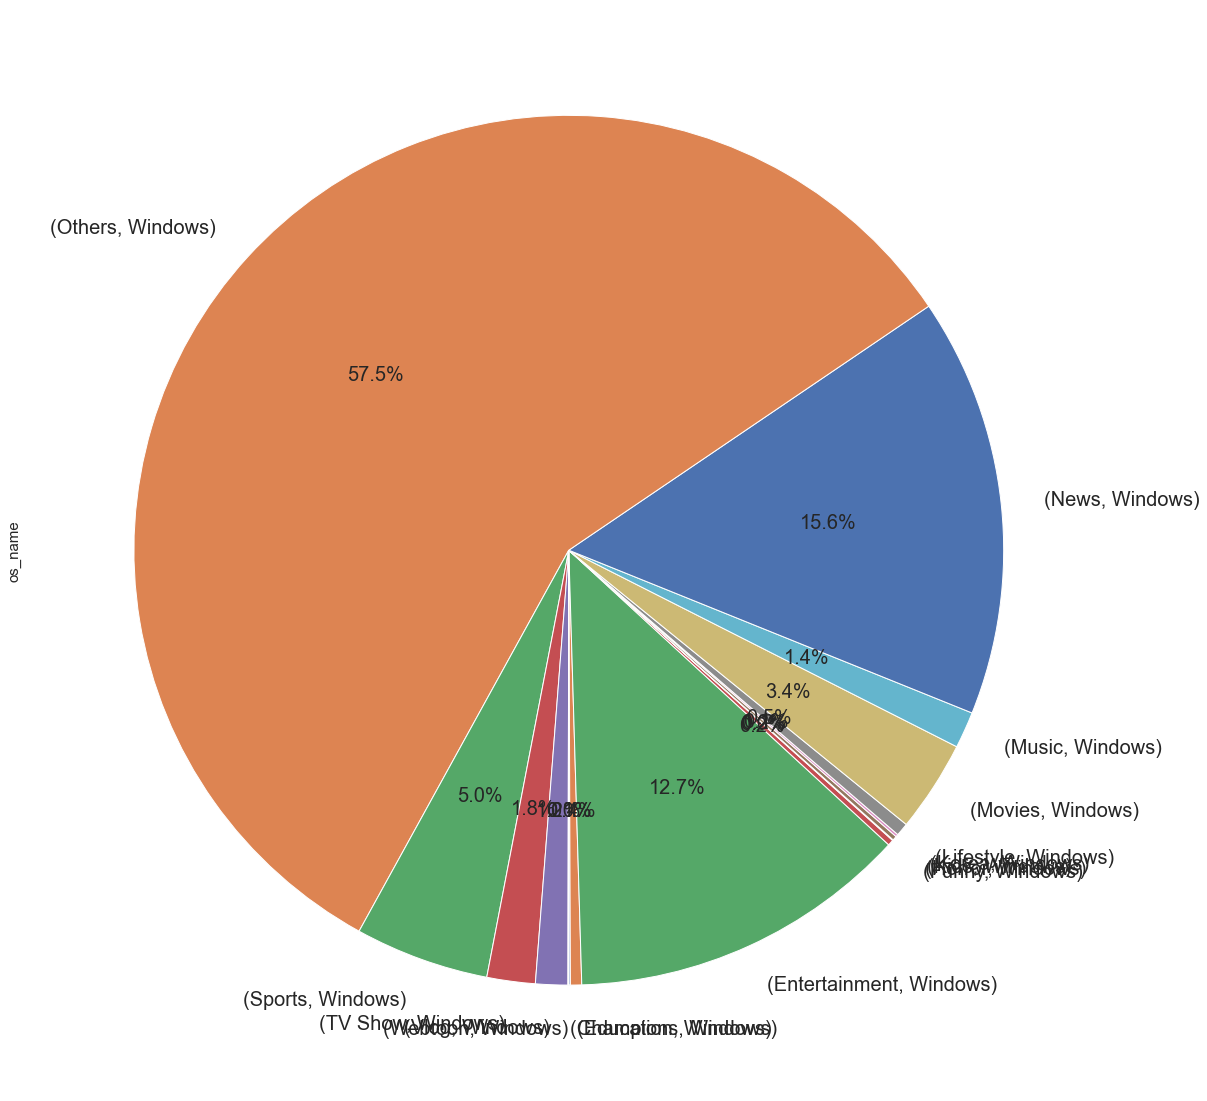

In [330]:
pplt.title("Video Category per OS",fontsize= 20)
dataset_android.groupby('category_name')['os_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=270, figsize = (20, 20), fontsize= 20)
pplt.show()
dataset_ios.groupby('category_name')['os_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=270, figsize = (20, 20), fontsize= 20)
pplt.show()
dataset_windows.groupby('category_name')['os_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=270, figsize = (20, 20), fontsize= 20)
pplt.show()
